In [24]:
pip install sklearn2pmml==0.108.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user -U scikit-learn==1.4.2

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn as sk
import pandas as pd
import sklearn2pmml

In [2]:
df = pd.read_csv("./data/cgp/set-final.csv", dtype={"Generacion": int, "Numero de nodos": int, "Numero de funciones":int, "Numero de terminales":int, 
                                                 "Iteraciones Promedio DoWhile":int, "Profundidad":int, "Terminal Agregar":int, "Terminal Eliminar":int, "Terminal Mejora":int,
                                                 "ErrorRelativoPromedio":float,"Fitness":float,"Tiempo de Ejecucion Promedio(ms)":float })

In [3]:
X = df.drop(['score_aceptabilidad'], axis=1)
X.keys()

Index(['Generacion', 'Numero de Nodos', 'Numero de Terminales',
       'Numero de Funciones', 'Iteraciones Promedio DoWhile',
       'Terminal Agregar', 'Terminal Eliminar', 'Terminal Fits',
       'Terminal Empty', 'Profundidad'],
      dtype='object')

In [4]:
Y = df['score_aceptabilidad']
display(Y)

0         1
1         1
2         1
3         1
4         1
         ..
246464    0
246465    0
246466    0
246467    0
246468    0
Name: score_aceptabilidad, Length: 246469, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=16)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.svm import LinearSVC

pipeline = PMMLPipeline([
	("classifier", LogisticRegression(random_state=16,max_iter=1000))
])

#pipeline_svm = PMMLPipeline([
#    ("classifier", SVC(max_iter=1000, kernel="precomputed"))
#])
pipeline_svm = PMMLPipeline([
    ("classfier", LinearSVC())
])

pipeline_mlpc = PMMLPipeline([
    ("classifier", MLPClassifier(max_iter=1000, activation="relu"))
])


### Proceso de entremaniento modelo LogisticRegression

In [7]:
pipeline.fit(x_train, y_train)

PMMLPipeline(steps=[('classifier', LogisticRegression(max_iter=1000, random_state=16))])

In [8]:
y_pred = pipeline.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)

In [10]:
print(matriz)

[[ 2497  1434]
 [ 1280 56407]]


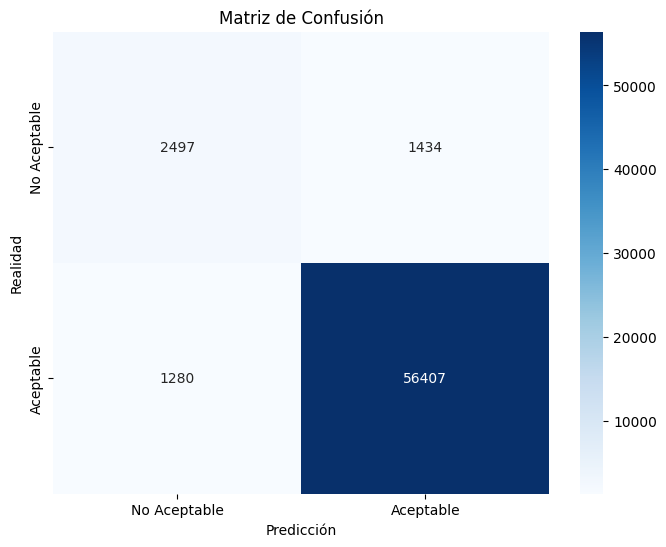

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['No Aceptable', 'Aceptable'], yticklabels=['No Aceptable', 'Aceptable'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [11]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.9752078975121453


In [12]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print(exactitud)

0.955954428900646


In [13]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(recall)

0.9778112919721947


In [14]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f1)

0.976507859566512


### Entrenamiento de SVM

In [15]:
pipeline_svm.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


PMMLPipeline(steps=[('classfier', LinearSVC())])

In [16]:
svm_pred = pipeline_svm.predict(x_test)
matriz_svm = confusion_matrix(y_test, svm_pred)
exactitud = accuracy_score(y_test, svm_pred)
print(exactitud)

0.9362037067090785


### Entrenamiento de MLP

In [17]:
pipeline_mlpc.fit(x_train, y_train)

PMMLPipeline(steps=[('classifier', MLPClassifier(max_iter=1000))])

In [19]:
mlpc_pred = pipeline_mlpc.predict(x_test)
matriz_mlpc = confusion_matrix(y_test, mlpc_pred)
exactitud_mlp = accuracy_score(y_test, mlpc_pred)
print(exactitud_mlp)

0.9694082897854523


In [20]:
from sklearn2pmml import sklearn2pmml

sklearn2pmml(pipeline, "LRCGP.pmml", with_repr = True)

In [21]:
sklearn2pmml(pipeline_svm, "LSVCCGP.pmml", with_repr = True)

In [22]:
sklearn2pmml(pipeline_mlpc, "MLPCCGP.pmml", with_repr = True)

In [23]:
df = pd.read_csv("./data/cgp/set-final-2.csv", dtype={"Generacion": int, "Numero de nodos": int, "Numero de funciones":int, "Numero de terminales":int, 
                                                 "Iteraciones Promedio DoWhile":int, "Profundidad":int, "Terminal Agregar":int, "Terminal Eliminar":int, "Terminal Mejora":int,
                                                 "ErrorRelativoPromedio":float,"Fitness":float,"Tiempo de Ejecucion Promedio(ms)":float })

X2 = df.drop(['score_aceptabilidad'], axis=1)
Y2 = Y = df['score_aceptabilidad']

In [24]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.99, random_state=16)

In [25]:
test_pred = pipeline.predict(x2_test)

In [26]:
matriz2 = confusion_matrix(y2_test, test_pred)
precision2 = precision_score(y2_test, test_pred)
exactitud2 = accuracy_score(y2_test, test_pred)
print("Matriz de Confusion: ")
print(matriz2)
print("Precision: ")
print(precision2)
print("Exactitud: ")
print(exactitud2)

Matriz de Confusion: 
[[   397   1205]
 [190995  96749]]
Precision: 
0.987698307368765
Exactitud: 
0.3357433660738355


In [27]:
test_pred_svm = pipeline_svm.predict(x2_test)

In [28]:
accuracy_score(y2_test, test_pred_svm)

0.630038085890249

In [29]:
test_pred_mlpc = pipeline_mlpc.predict(x2_test)

In [30]:
accuracy_score(y2_test, test_pred_mlpc)

0.6490430142459201